<a href="https://colab.research.google.com/github/ap12798/Applied_Deep_Learning/blob/main/Lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD 
from matplotlib import pyplot as plt


In [10]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [32]:
y_train[0:12]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

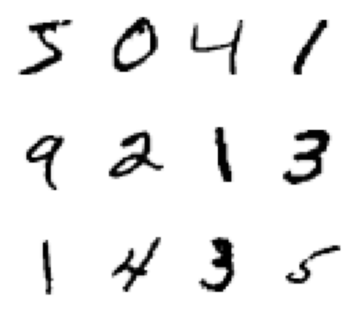

In [17]:
plt.figure(figsize=(5,5))
for k in range(12):
  plt.subplot(3, 4, k+1)
  plt.imshow(X_train[k], cmap='Greys')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Preprocess Data
# Reshape the data so that it lines up with the input and output layers of the network
# Input data is initially integer values 0-255, so convert those to float and divide by 255 to scale between 0 and 1
# Convert the y(labels) so one-hot encoded outputs representing each of the 10 digits. 

In [19]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [20]:
X_train /= 255

In [21]:
X_valid /= 255

In [23]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [25]:
# three layers so not a deep network
model = Sequential() 
model.add(Dense(64, activation='sigmoid', input_shape=(784, ))) # adding a dense layer with 64 neurons, sigmoid activation, basic architecture for first layer
model.add(Dense(10, activation='softmax')) # output layer dense layer of 10 neurons

In [30]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, 
          batch_size = 128, epochs = 200, # 200 passes through data
          verbose = 1,
          validation_data = (X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 2s 3ms/step - loss: 0.0927 - accuracy: 0.0989 - val_loss: 0.0910 - val_accuracy: 0.1099
Epoch 2/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0908 - accuracy: 0.1325 - val_loss: 0.0901 - val_accuracy: 0.1867
Epoch 3/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0900 - accuracy: 0.1936 - val_loss: 0.0895 - val_accuracy: 0.2062
Epoch 4/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.2064 - val_loss: 0.0891 - val_accuracy: 0.2115
Epoch 5/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0890 - accuracy: 0.2097 - val_loss: 0.0886 - val_accuracy: 0.2167
Epoch 6/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0886 - accuracy: 0.2132 - val_loss: 0.0882 - val_accuracy: 0.2203
Epoch 7/200
469/469 [==============================] - 1s 3ms/step - loss: 0.0882 - accuracy: 0.2196 - val_loss: 0.0879 - val_accuracy: 0.2238

In [33]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.8655


[0.027586542069911957, 0.8654999732971191]

In [ ]:
# recap
# batch and epoch
# basic architecture input and out and deep has more than 3 layers
# layers have activation
# shapes need to match - check video
